In [43]:
import numpy as np
import pandas as pd

from datetime import datetime
import matplotlib.pyplot as plt

In [44]:
df = pd.read_csv('../../data/bitcoin/price/bitcoin_chart.csv')
df['Date'] = pd.to_datetime(df['Timestamp']).dt.date

# Define the date range
start_date = datetime.strptime('2022-01-01', '%Y-%m-%d').date()
end_date = datetime.strptime('2024-01-01', '%Y-%m-%d').date()

# Filter the DataFrame for the desired date range
df = df[(df['Date'] >= start_date) & (df['Date'] < end_date)]
df = df[['Date', 'Price']]
df

,Date,Price
3168,2022-01-01,46319.651088
3169,2022-01-02,47816.077676
3170,2022-01-03,47387.212168
3171,2022-01-04,46531.140861
3172,2022-01-05,45938.024272
...,...,...
3862,2023-11-26,37809.852866
3863,2023-11-27,37491.838186
3864,2023-11-28,37250.169051
3865,2023-11-29,37802.236044


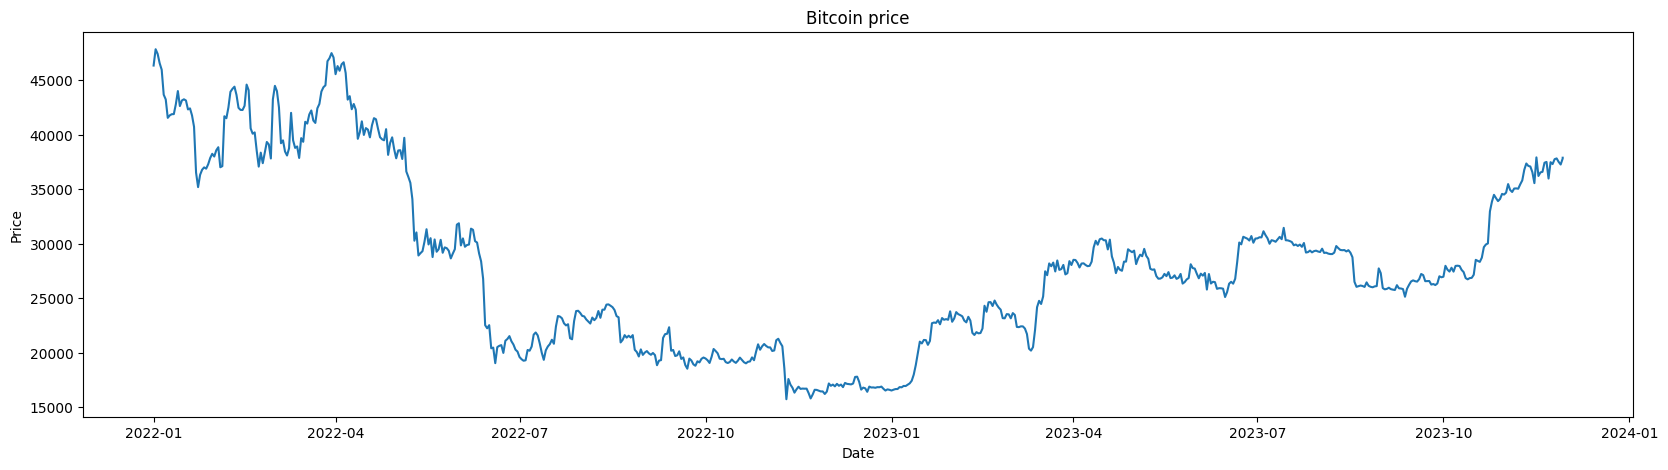

In [45]:
# plot the df with the price and the date
plt.figure(figsize=(20, 5))
plt.plot(df['Date'], df['Price'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Bitcoin price')
plt.show()

In [46]:
df['Price_Variation'] = df['Price'].diff()
df['Percentage_Variation'] = df['Price_Variation'] / df['Price'] * 100
df = df.dropna()
df

,Date,Price,Price_Variation,Percentage_Variation
3169,2022-01-02,47816.077676,1496.426588,3.129547
3170,2022-01-03,47387.212168,-428.865509,-0.905024
3171,2022-01-04,46531.140861,-856.071307,-1.839781
3172,2022-01-05,45938.024272,-593.116589,-1.291123
3173,2022-01-06,43647.147508,-2290.876764,-5.248629
...,...,...,...,...
3862,2023-11-26,37809.852866,70.921169,0.187573
3863,2023-11-27,37491.838186,-318.014680,-0.848224
3864,2023-11-28,37250.169051,-241.669135,-0.648773
3865,2023-11-29,37802.236044,552.066992,1.460408


In [47]:
def compute_mean_std(df, column):
    mean = df[column].mean()
    std = df[column].std()
    return mean, std

mean, std = compute_mean_std(df, 'Percentage_Variation')

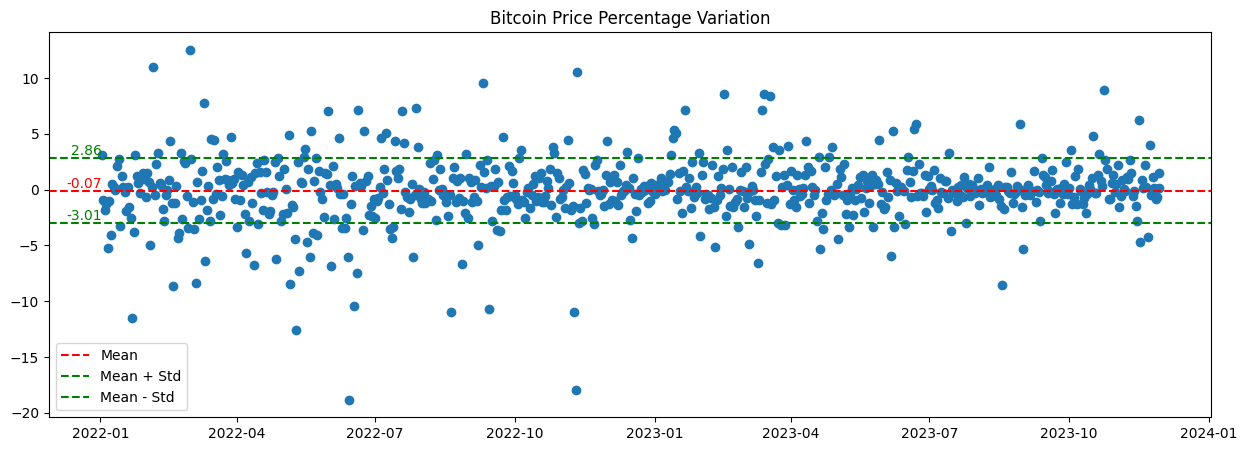

In [48]:
# scatter plot of the percentage variation
plt.figure(figsize=(15, 5))
plt.scatter(df['Date'], df['Percentage_Variation'])
plt.title('Bitcoin Price Percentage Variation')

# plot the mean and standard deviation
plt.axhline(mean, color='r', linestyle='--', label='Mean')
plt.axhline(mean + std, color='g', linestyle='--', label='Mean + Std')
plt.axhline(mean - std, color='g', linestyle='--', label='Mean - Std')

# add text annotations for mean, mean + std, and mean - std
plt.text(df['Date'].iloc[0], mean, f'{mean:.2f}', color='r', ha='right', va='bottom')
plt.text(df['Date'].iloc[0], mean + std, f'{mean + std:.2f}', color='g', ha='right', va='bottom')
plt.text(df['Date'].iloc[0], mean - std, f'{mean - std:.2f}', color='g', ha='right', va='bottom')

plt.legend()
plt.show()


In [49]:
data_points = df["Price"].values.tolist()
buy = 0
sell = 1
nothing = 2
current_action = nothing

# keep track of the actions to plot them later
states_buy = [] 
states_sell = []

money = 100
share_to_move = 1/3
possessed_shares = 0

for i in range(0, len(data_points)):
    previous_price = data_points[i - 1]
    current_price = data_points[i]
    
    # the buy trigger should be a percentage of the mean and standard deviation
    buy_trigger = (((mean - std) / 100) * previous_price) + previous_price
    sell_trigger = (((mean + std) / 100) * previous_price) + previous_price
    
    if current_action == nothing:
        if current_price < buy_trigger:
            current_action = buy
            share_to_buy = money * share_to_move / current_price
            money -= share_to_buy * current_price
            possessed_shares += share_to_buy
            states_buy.append(i)
            
        elif current_price > sell_trigger and possessed_shares > 0:
            current_action = sell
            money += possessed_shares * current_price
            possessed_shares = 0
            states_sell.append(i)
            
    elif current_action == buy:
        if current_price > sell_trigger and possessed_shares > 0:
            current_action = sell
            money += possessed_shares * current_price
            possessed_shares = 0
            states_sell.append(i)
            
    elif current_action == sell:
        if current_price < buy_trigger:
            current_action = buy
            share_to_buy = money * share_to_move / current_price
            money -= share_to_buy * current_price
            possessed_shares += share_to_buy
            states_buy.append(i)
            
    
    print(f"Money: {money}, Shares: {possessed_shares}, Price: {current_price}, Action: {current_action}")
    
print(f"Final Money: {money}, Final Shares: {possessed_shares}")
print(f"Final Value: {money + (possessed_shares * current_price)}")

Money: 100, Shares: 0, Price: 47816.07767640849, Action: 2
Money: 100, Shares: 0, Price: 47387.212167697246, Action: 2
Money: 100, Shares: 0, Price: 46531.140860530526, Action: 2
Money: 100, Shares: 0, Price: 45938.02427172366, Action: 2
Money: 66.66666666666667, Shares: 0.0007637001553691856, Price: 43647.14750806805, Action: 0
Money: 66.66666666666667, Shares: 0.0007637001553691856, Price: 43216.45867693359, Action: 0
Money: 66.66666666666667, Shares: 0.0007637001553691856, Price: 41527.197042644846, Action: 0
Money: 66.66666666666667, Shares: 0.0007637001553691856, Price: 41756.66232397826, Action: 0
Money: 66.66666666666667, Shares: 0.0007637001553691856, Price: 41862.3609856517, Action: 0
Money: 66.66666666666667, Shares: 0.0007637001553691856, Price: 41869.85905559219, Action: 0
Money: 66.66666666666667, Shares: 0.0007637001553691856, Price: 42777.21102048236, Action: 0
Money: 66.66666666666667, Shares: 0.0007637001553691856, Price: 43981.87732717414, Action: 0
Money: 66.66666666

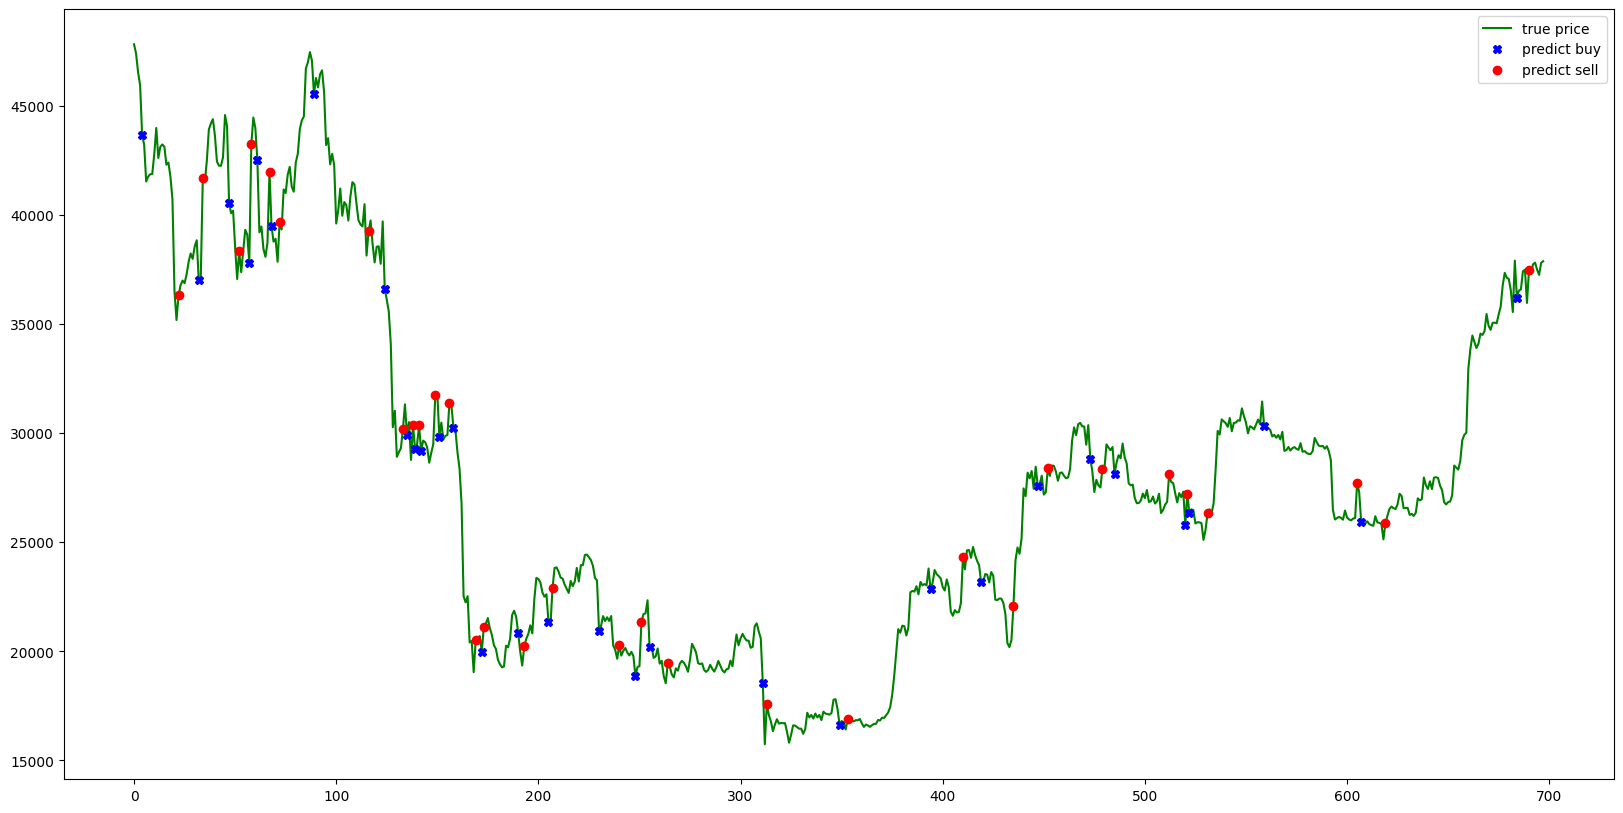

In [50]:
plt.figure(figsize = (20, 10))
plt.plot(data_points, label = 'true price', c = 'g')
plt.plot(data_points, 'X', label = 'predict buy', markevery = states_buy, c = 'b')
plt.plot(data_points, 'o', label = 'predict sell', markevery = states_sell, c = 'r')
plt.legend()
plt.show()

In [71]:
# Define initial capital
initial_capital = 100

# Initialize portfolio value and positions
portfolio = pd.DataFrame(index=df.index, columns=['Cash', 'Holdings', 'Total'], data=0.0)

# Set initial capital and holdings at the first index of df
portfolio.loc[df.index[0], 'Cash'] = initial_capital
portfolio.loc[df.index[0], 'Holdings'] = 0
portfolio.loc[df.index[0], 'Total'] = initial_capital

# Define percentage of capital to use for each trade
buy_pct = 0.5  # Buy using 50% of available capital
sell_pct = 0.7  # Sell using 50% of current holdings

# Define parameters
short_window = 5
long_window = 25

# Calculate moving averages
short_mavg = df['Price'].rolling(window=short_window, min_periods=1).mean()
long_mavg = df['Price'].rolling(window=long_window, min_periods=1).mean()

# Initialize positions
positions = pd.Series(index=df.index, data=0)
positions[short_mavg.index] = np.where(short_mavg > long_mavg, 1, 0)

# Generate trading signals
signals = positions.diff()

In [72]:
for i in range(df.index[1], df.index[len(df) - 1] + 1):
    index = i - df.index[1] + 1
    
    if signals.iloc[index] == 1.0:  # Buy signal
        if portfolio['Cash'][i - 1] > 0:
            buy_amount = buy_pct * portfolio['Cash'][i - 1]
            shares_to_buy = buy_amount / data_points[index]
            
            portfolio.loc[i, 'Holdings'] = portfolio.loc[i - 1, 'Holdings'] + shares_to_buy
            portfolio.loc[i, 'Cash'] = portfolio['Cash'][i - 1] - buy_amount
            portfolio.loc[i, 'Total'] = portfolio['Cash'][i] + portfolio['Holdings'][i] * data_points[index]
            
    elif signals.iloc[index] == -1.0:  # Sell signal
        if portfolio['Holdings'][i - 1] > 0:
            sell_amount = sell_pct * portfolio['Holdings'][i - 1] * data_points[index]
            shares_to_sell = sell_amount / data_points[index]
            
            portfolio.loc[i, 'Cash'] = portfolio.loc[i - 1, 'Cash'] + sell_amount
            portfolio.loc[i, 'Holdings'] = portfolio['Holdings'][i - 1] - shares_to_sell
            portfolio.loc[i, 'Total'] = portfolio['Cash'][i] + portfolio['Holdings'][i] * data_points[index]
    else:
        portfolio.loc[i, 'Holdings'] = portfolio['Holdings'][i - 1]
        portfolio.loc[i, 'Cash'] = portfolio['Cash'][i - 1]
        portfolio.loc[i, 'Total'] = portfolio['Cash'][i] + portfolio['Holdings'][i] * data_points[index]
    

print(f"Final Money: {portfolio['Cash'][df.index[len(df) - 1]]:.2f}, Final Shares: {portfolio['Holdings'][df.index[len(df) - 1]]:.6f}")
print(f"Portfolio Value: {portfolio['Total'].iloc[-1]:.2f}")

Final Money: 32.68, Final Shares: 0.001664
Portfolio Value: 95.69


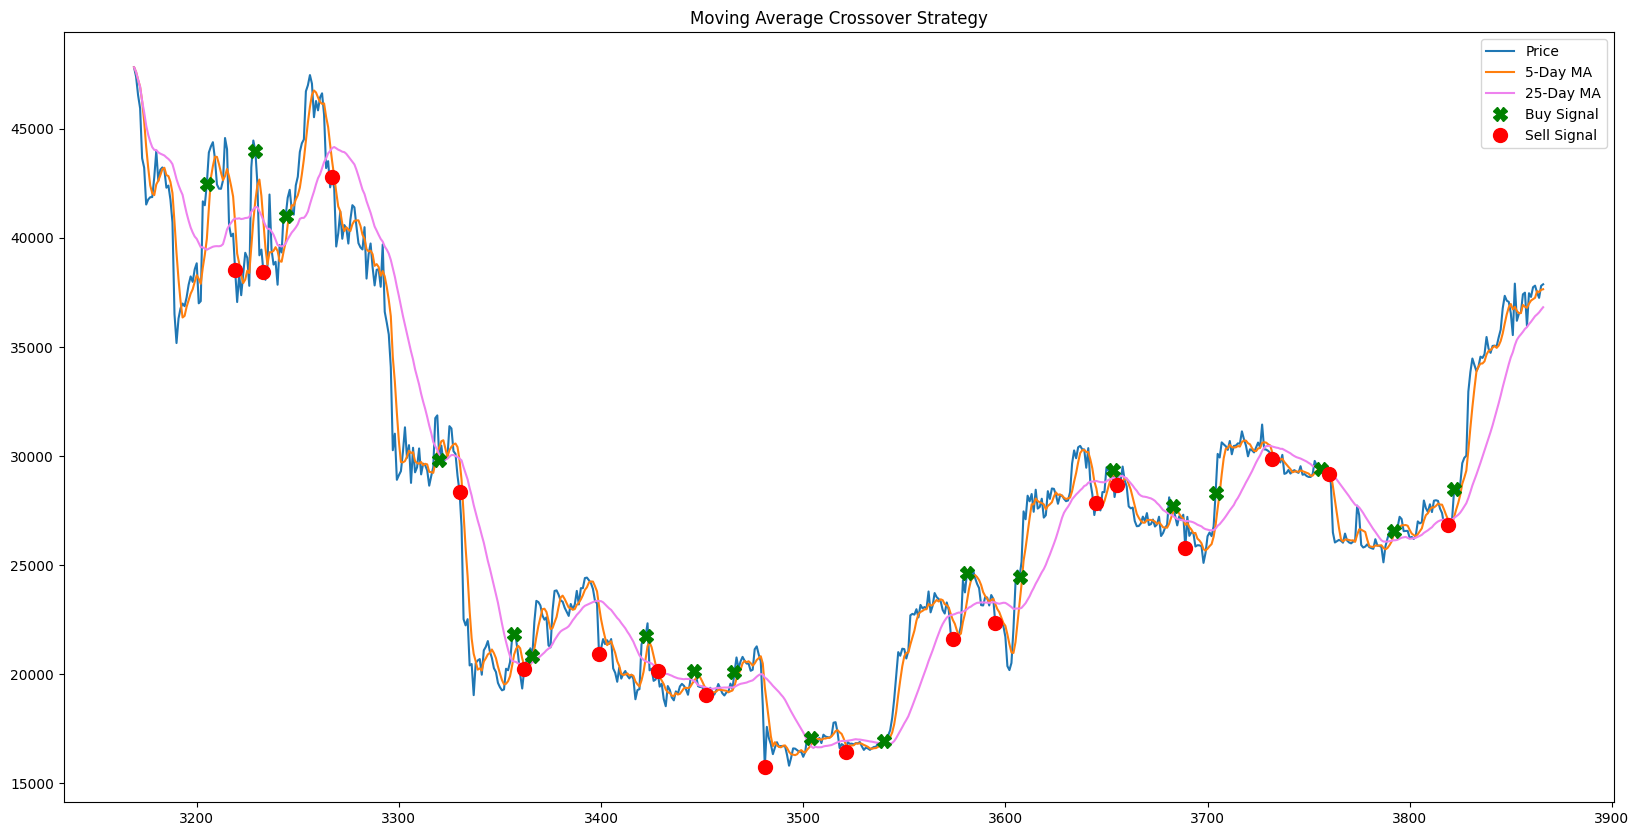

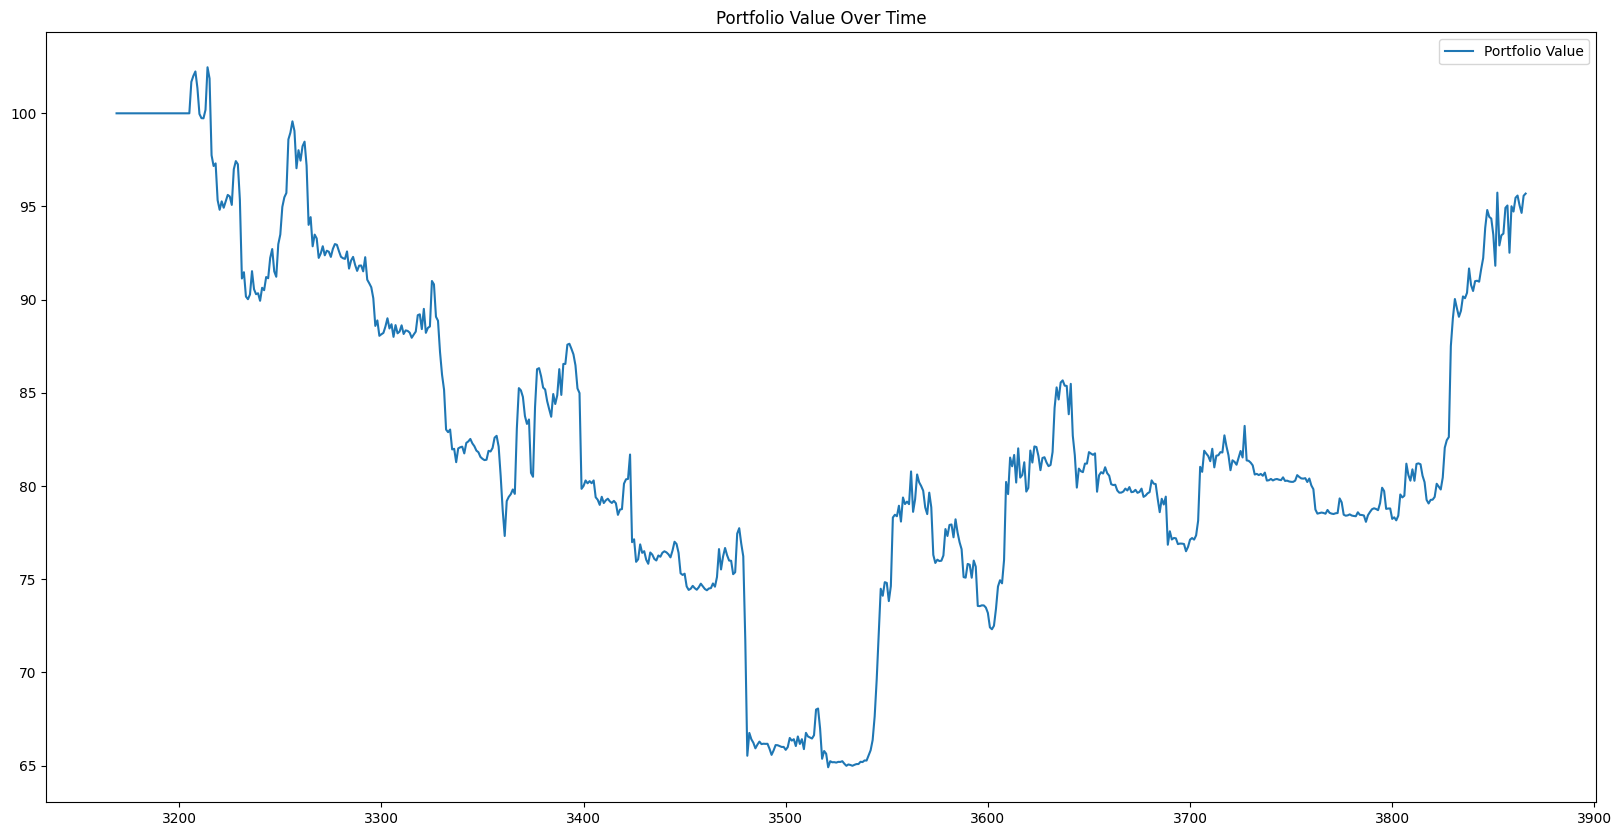

In [73]:
# Plotting
plt.figure(figsize=(20, 10))
plt.plot(df['Price'], label='Price')
plt.plot(short_mavg, label=f'{short_window}-Day MA')
plt.plot(long_mavg, label=f'{long_window}-Day MA', color='violet')

# Plot signals
plt.plot(df['Price'][signals == 1], 'X', markersize=10, color='g', label='Buy Signal')
plt.plot(df['Price'][signals == -1], 'o', markersize=10, color='r', label='Sell Signal')

plt.title('Moving Average Crossover Strategy')
plt.legend()
plt.show()

# Plot portfolio value
plt.figure(figsize=(20, 10))
plt.plot(portfolio['Total'], label='Portfolio Value')
plt.title('Portfolio Value Over Time')
plt.legend()
plt.show()